**INITIAL SETUP & DATA LOADING**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Load dataset

df = pd.read_csv("/content/supply_chain_data.csv")

In [124]:
# Quick inspection

print("Dataset Preview:")
print(df.head())

Dataset Preview:
  Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai   

In [125]:
# Check columns

print("Columns in dataset:")
for i in df.columns:
    print(i)

Columns in dataset:
Product type
SKU
Price
Availability
Number of products sold
Revenue generated
Customer demographics
Stock levels
Lead times
Order quantities
Shipping times
Shipping carriers
Shipping costs
Supplier name
Location
Lead time
Production volumes
Manufacturing lead time
Manufacturing costs
Inspection results
Defect rates
Transportation modes
Routes
Costs


In [126]:
# Unique values per column

print("Unique values for each columns:")
print("_" * 100)

for column in df.columns:
  unique_values = df[column].unique()
  print(f"Column: {column}")
  print(f"Number of unique values: {len(unique_values)}")
  print(f"Unique values: {unique_values}")
  print("_" * 100)

Unique values for each columns:
____________________________________________________________________________________________________
Column: Product type
Number of unique values: 3
Unique values: ['haircare' 'skincare' 'cosmetics']
____________________________________________________________________________________________________
Column: SKU
Number of unique values: 100
Unique values: ['SKU0' 'SKU1' 'SKU2' 'SKU3' 'SKU4' 'SKU5' 'SKU6' 'SKU7' 'SKU8' 'SKU9'
 'SKU10' 'SKU11' 'SKU12' 'SKU13' 'SKU14' 'SKU15' 'SKU16' 'SKU17' 'SKU18'
 'SKU19' 'SKU20' 'SKU21' 'SKU22' 'SKU23' 'SKU24' 'SKU25' 'SKU26' 'SKU27'
 'SKU28' 'SKU29' 'SKU30' 'SKU31' 'SKU32' 'SKU33' 'SKU34' 'SKU35' 'SKU36'
 'SKU37' 'SKU38' 'SKU39' 'SKU40' 'SKU41' 'SKU42' 'SKU43' 'SKU44' 'SKU45'
 'SKU46' 'SKU47' 'SKU48' 'SKU49' 'SKU50' 'SKU51' 'SKU52' 'SKU53' 'SKU54'
 'SKU55' 'SKU56' 'SKU57' 'SKU58' 'SKU59' 'SKU60' 'SKU61' 'SKU62' 'SKU63'
 'SKU64' 'SKU65' 'SKU66' 'SKU67' 'SKU68' 'SKU69' 'SKU70' 'SKU71' 'SKU72'
 'SKU73' 'SKU74' 'SKU75' 'SKU

In [127]:
# Missing values

df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [128]:
# Chcek for duplicates

df.duplicated().sum()

np.int64(0)

In [129]:
df.dtypes

,0
Product type,object
SKU,object
Price,float64
Availability,int64
Number of products sold,int64
Revenue generated,float64
Customer demographics,object
Stock levels,int64
Lead times,int64
Order quantities,int64


**EXPLORATORY DATA ANALYSIS**

**REVENUE ANALYSIS**

In [130]:
# Revenue by product type

product_type = df.groupby("Product type")["Revenue generated"].agg("sum")

In [131]:
product_type

,Revenue generated
Product type,
cosmetics,161521.265999
haircare,174455.390605
skincare,241628.162133


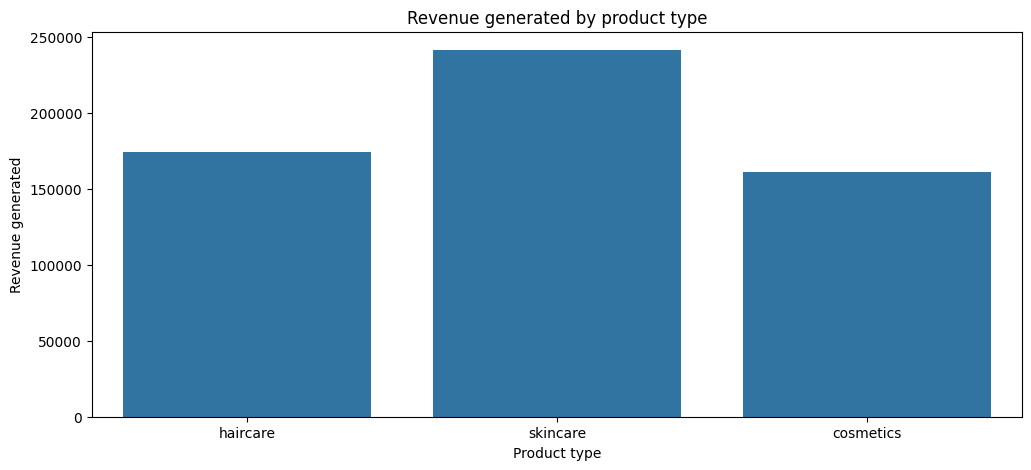

In [132]:
# Visualization of product type revenue

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(data = df,
            x = "Product type",
            y = "Revenue generated",
            estimator = "sum",
            errorbar = None)
plt.title("Revenue generated by product type")
plt.show()

**TOP 10 REVENUE BY SKUs**

In [133]:
top_skus = df.groupby("SKU")["Revenue generated"].agg("sum").nlargest(10)

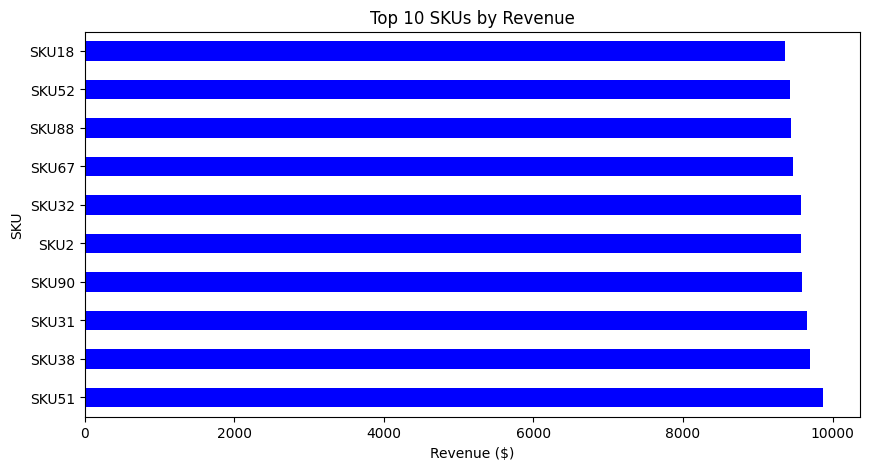

In [134]:
# Visualization of top skus

top_skus.plot(kind="barh",
              figsize = (10, 5),
              color = "blue")
plt.title("Top 10 SKUs by Revenue")
plt.xlabel("Revenue ($)")
plt.show()

**DEFECT RATE BY SUPPLIERS**

In [135]:
df.groupby("Supplier name")["Defect rates"].agg("mean")

,Defect rates
Supplier name,
Supplier 1,1.803630
Supplier 2,2.362750
Supplier 3,2.465786
Supplier 4,2.337397
Supplier 5,2.665408


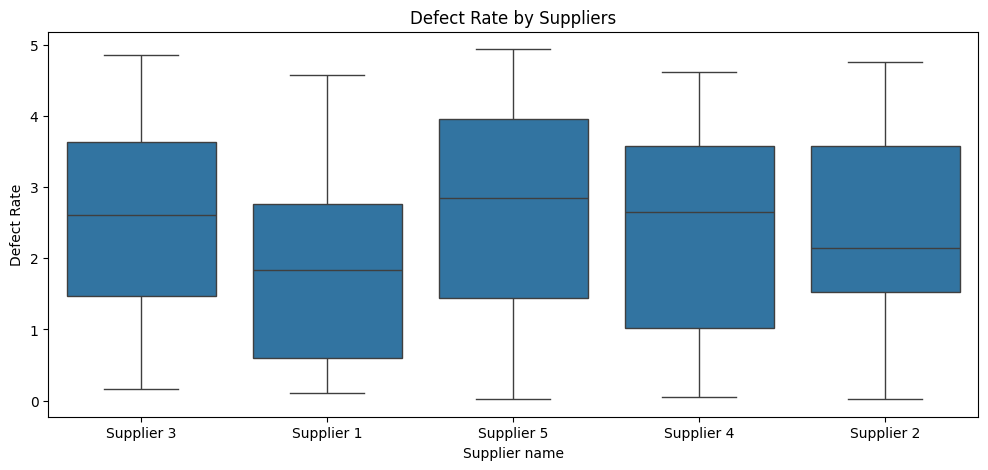

In [136]:
plt.figure(figsize=(12, 5))
sns.boxplot(data = df,
            x = "Supplier name",
            y = "Defect rates")
plt.title("Defect Rate by Suppliers")
plt.ylabel("Defect Rate")
plt.show()

**SHIPPING TIME BY CARRIER**

In [137]:
df.groupby("Shipping carriers")["Shipping times"].agg("mean")

,Shipping times
Shipping carriers,
Carrier A,6.142857
Carrier B,5.302326
Carrier C,6.034483


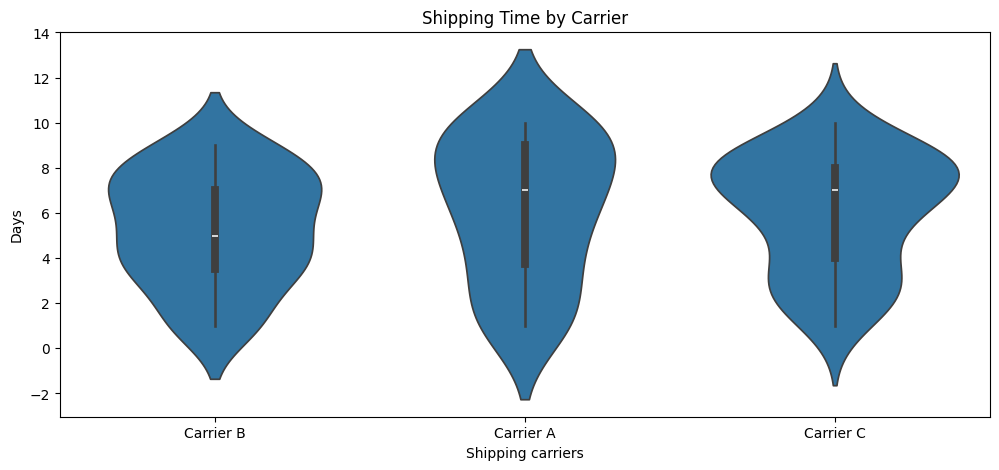

In [138]:
plt.figure(figsize=(12, 5))
sns.violinplot(data = df,
               x = "Shipping carriers",
               y = "Shipping times")
plt.title("Shipping Time by Carrier")
plt.ylabel("Days")
plt.show()

**CUSTOMER AND INVENTORY ANALYSIS**

*STOCK LEVEL VS SALES*

In [139]:
df.groupby("Stock levels")["Number of products sold"].agg("sum")

,Number of products sold
Stock levels,
0,163
1,610
2,280
4,1735
5,2273
...,...
95,511
96,601
97,800


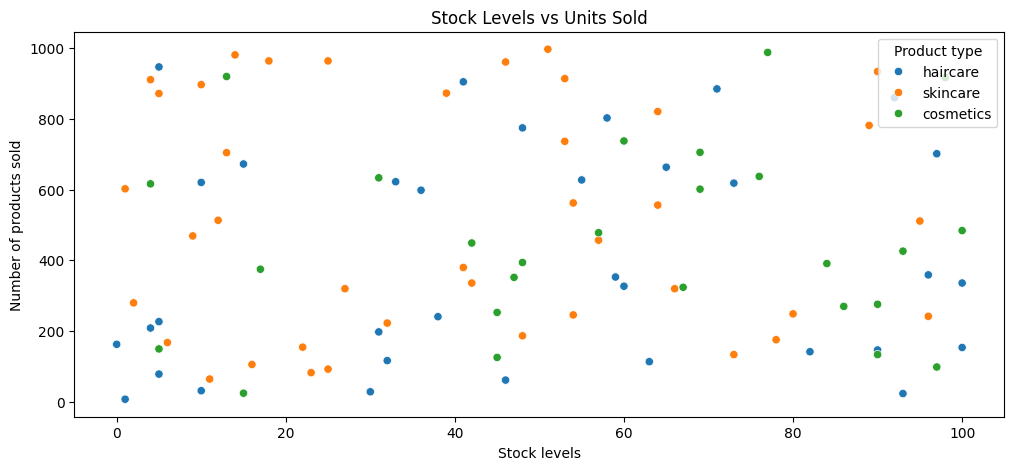

In [140]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data = df,
                x = "Stock levels",
                y = "Number of products sold",
                hue = "Product type")
plt.title("Stock Levels vs Units Sold")
plt.show()

**CUSTOMER DEMOGRAPHICS**

In [141]:
df["Customer demographics"].value_counts()

,count
Customer demographics,
Unknown,31
Female,25
Non-binary,23
Male,21


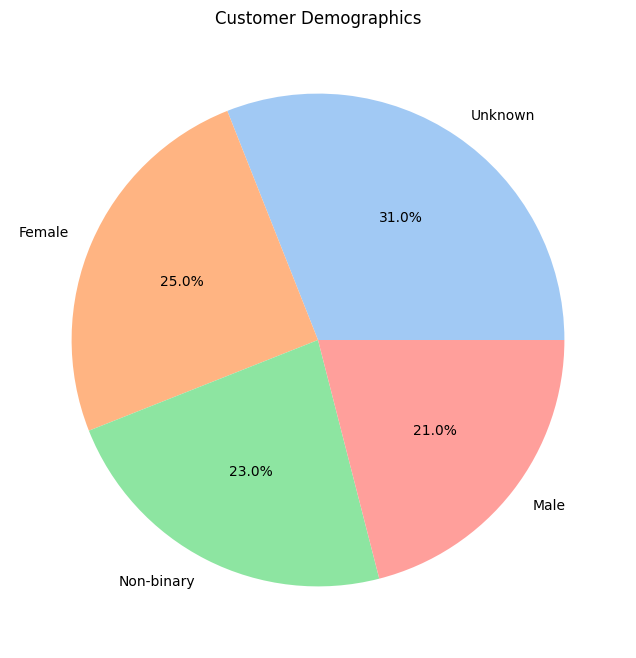

In [142]:
df["Customer demographics"].value_counts().plot.pie(
    autopct='%1.1f%%',
    figsize=(8, 8),
    colors=sns.color_palette('pastel')
)
plt.title("Customer Demographics")
plt.ylabel("")
plt.show()

**CORRELATION HEATMAP**

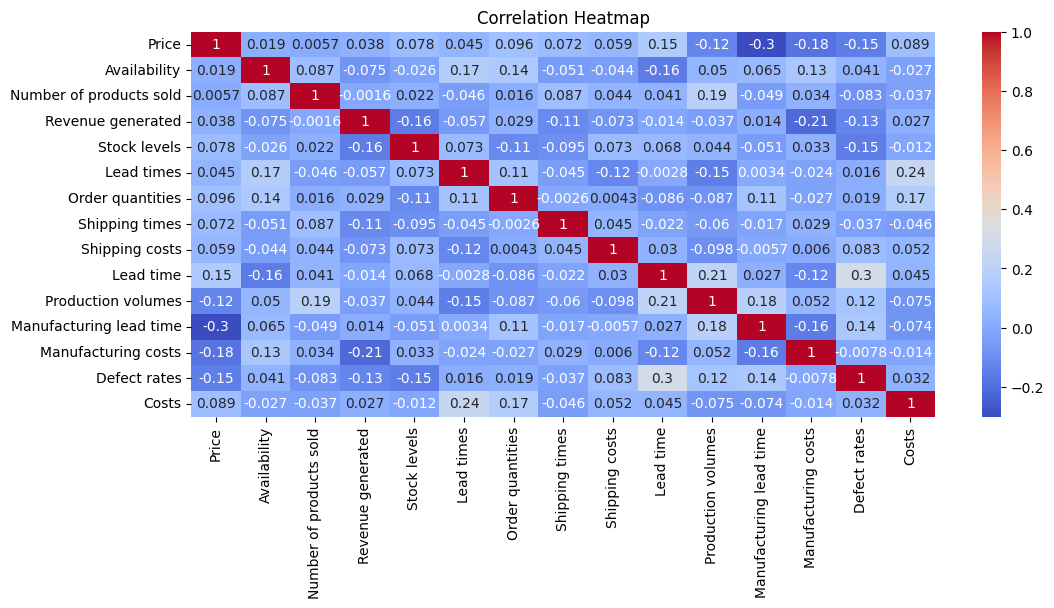

In [143]:
plt.figure(figsize=(12, 5))
numeric_df = df.select_dtypes(include=["float64", "int64"])
sns.heatmap(
    numeric_df.corr(),
    annot = True,
    cmap = "coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

**PRODUCTION LEAD TIME BY LOCATION**

In [144]:
df.groupby(["Location", "Product type"])["Manufacturing lead time"].agg("mean")

Location   Product type
Bangalore  cosmetics        7.333333
           haircare        14.111111
           skincare        10.500000
Chennai    cosmetics        9.800000
           haircare        18.166667
           skincare        10.555556
Delhi      cosmetics       18.500000
           haircare        10.000000
           skincare        10.400000
Kolkata    cosmetics       12.750000
           haircare        18.375000
           skincare        13.615385
Mumbai     cosmetics       14.125000
           haircare        22.428571
           skincare        23.428571
Name: Manufacturing lead time, dtype: float64

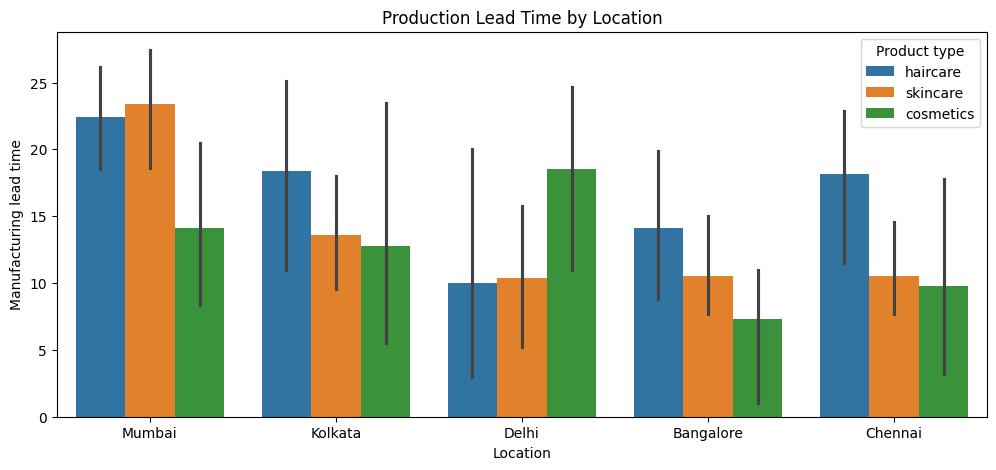

In [145]:
plt.figure(figsize=(12, 5))
sns.barplot(data = df,
            x = "Location",
            y = "Manufacturing lead time",
            hue = "Product type")
plt.title("Production Lead Time by Location")
plt.show()

### **SHIPPING DELAY ANALYSIS**

/tmp/ipython-input-146-34935671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,


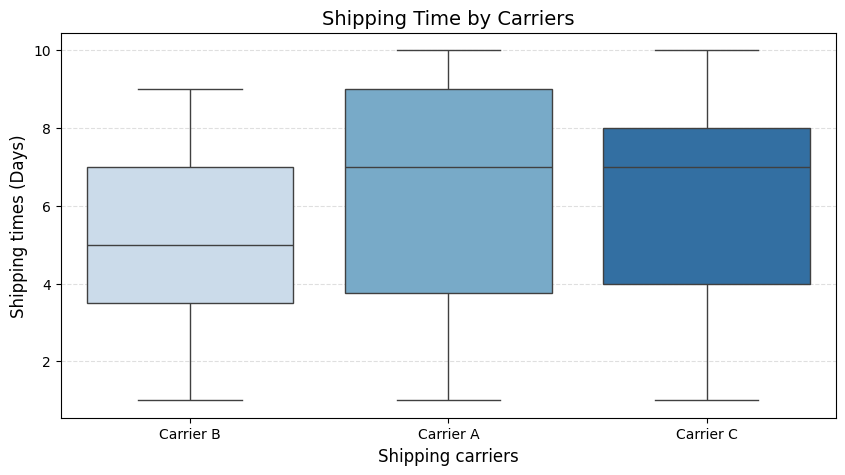

In [146]:
#Shipping time by carriers

plt.figure(figsize=(10, 5))
sns.boxplot(data = df,
            x = "Shipping carriers",
            y = "Shipping times",
            palette = "Blues")
plt.title("Shipping Time by Carriers", fontsize=14)
plt.xlabel("Shipping carriers", fontsize=12)
plt.ylabel("Shipping times (Days)", fontsize=12)
plt.grid(axis = "y",
         linestyle = "--",
         alpha = 0.4)
plt.show()

**ROUTE EFFICIENCY**

In [147]:
route_stats = df.groupby("Routes")["Shipping times"].agg("mean").sort_values()
route_stats

,Shipping times
Routes,
Route C,5.250000
Route B,5.702703
Route A,6.023256


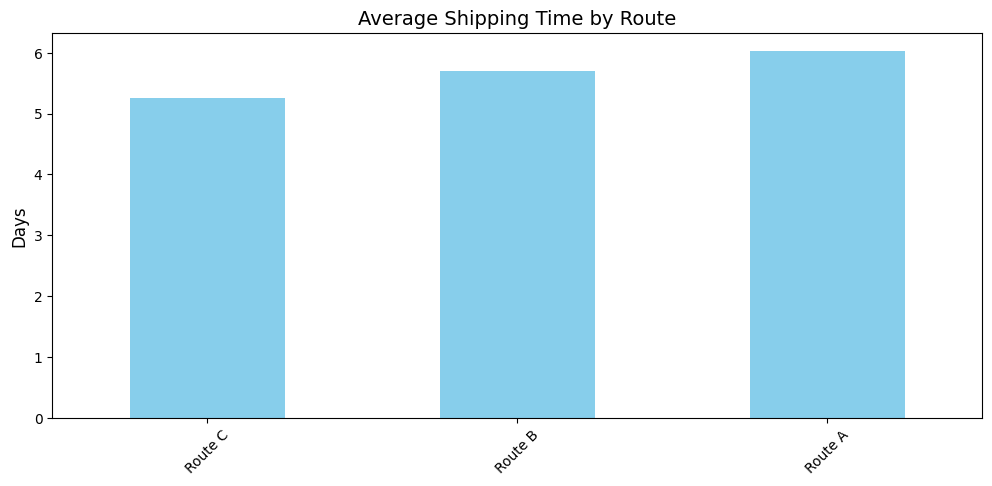

In [148]:
route_stats.plot(kind = "bar",
                 color = "skyblue",
                 figsize = (12, 5))
plt.title("Average Shipping Time by Route", fontsize = 14)
plt.ylabel("Days", fontsize = 12)
plt.xlabel("")
plt.xticks(rotation=45)
plt.show()

**GEOGRAPHICAL SHIPPING TIME**

In [149]:
location_delays = df.groupby("Location")["Shipping times"].mean()
location_delays

,Shipping times
Location,
Bangalore,5.277778
Chennai,6.000000
Delhi,5.933333
Kolkata,5.960000
Mumbai,5.545455


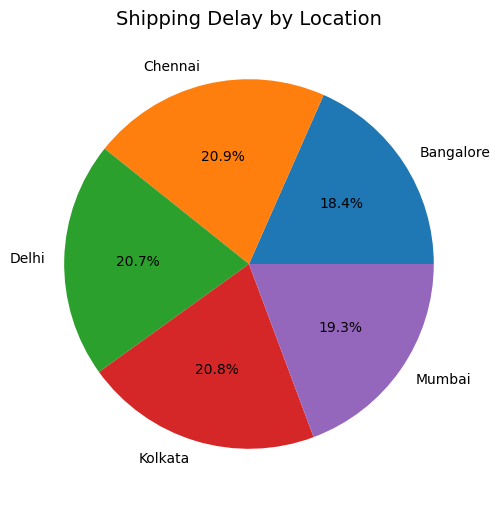

In [150]:
location_delays.plot(kind = "pie",
                     autopct = "%1.1f%%",
                     figsize = (8, 6))
plt.title("Shipping Delay by Location", fontsize=14)
plt.ylabel("")
plt.show()

**ORDERS > 7 DAYS**

In [151]:
df["Shipping times"] = df["Shipping times"].astype("float")

In [152]:
# Check for extreme shipping time delay

delayed_orders = df[df["Shipping times"] > 7][["SKU", "Shipping carriers", "Routes", "Location"]]
print(f"Orders with extreme days (> 7 days): \n{delayed_orders}")

Orders with extreme days (> 7 days): 
      SKU Shipping carriers   Routes   Location
4    SKU4         Carrier A  Route A      Delhi
6    SKU6         Carrier C  Route A    Kolkata
13  SKU13         Carrier A  Route B  Bangalore
17  SKU17         Carrier C  Route C    Chennai
18  SKU18         Carrier C  Route A    Kolkata
22  SKU22         Carrier A  Route C    Kolkata
24  SKU24         Carrier C  Route A  Bangalore
27  SKU27         Carrier C  Route B     Mumbai
33  SKU33         Carrier C  Route A    Chennai
35  SKU35         Carrier C  Route C      Delhi
37  SKU37         Carrier A  Route A    Kolkata
40  SKU40         Carrier C  Route A    Kolkata
41  SKU41         Carrier B  Route A    Chennai
43  SKU43         Carrier B  Route A     Mumbai
46  SKU46         Carrier B  Route B    Chennai
47  SKU47         Carrier B  Route A    Kolkata
50  SKU50         Carrier A  Route B      Delhi
60  SKU60         Carrier C  Route A     Mumbai
65  SKU65         Carrier C  Route C    Kolkata
66

**ACTIONABLE INSIGHTS**

In [153]:
print("\nKEY FINDINGS:")
print("-"*50)
print("1. Route A is the slowest (6.0 days avg) despite being most used")
print("2. 36.36% of extreme delays (>7 days) involve Carrier A")
print("3. Chennai has the worst delays (6 days avg)")
print("4. Carrier B shows consistent mid-range performance (5 days avg)")
print("5. Bangalore has the best shipping times (5.2 days avg)")


KEY FINDINGS:
--------------------------------------------------
1. Route A is the slowest (6.0 days avg) despite being most used
2. 36.36% of extreme delays (>7 days) involve Carrier A
3. Chennai has the worst delays (6 days avg)
4. Carrier B shows consistent mid-range performance (5 days avg)
5. Bangalore has the best shipping times (5.2 days avg)


In [154]:
print("\nPRIORITY ACTIONS (0-30 DAYS):")
print("-"*50)
print("→ RE-ROUTE 50% of Route A shipments to Route C (save 0.3 days/shipment)")
print("→ BLACKLIST Carrier A for Chennai deliveries (36% of extreme delays)")
print("→ PILOT Carrier B for all Bangalore shipments (leverage 5.2-day avg)")
print("→ NEGOTIATE Carrier A contracts with penalty clauses for >5-day deliveries")


PRIORITY ACTIONS (0-30 DAYS):
--------------------------------------------------
→ RE-ROUTE 50% of Route A shipments to Route C (save 0.3 days/shipment)
→ BLACKLIST Carrier A for Chennai deliveries (36% of extreme delays)
→ PILOT Carrier B for all Bangalore shipments (leverage 5.2-day avg)
→ NEGOTIATE Carrier A contracts with penalty clauses for >5-day deliveries
